<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/Testing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 1s 670ms/step


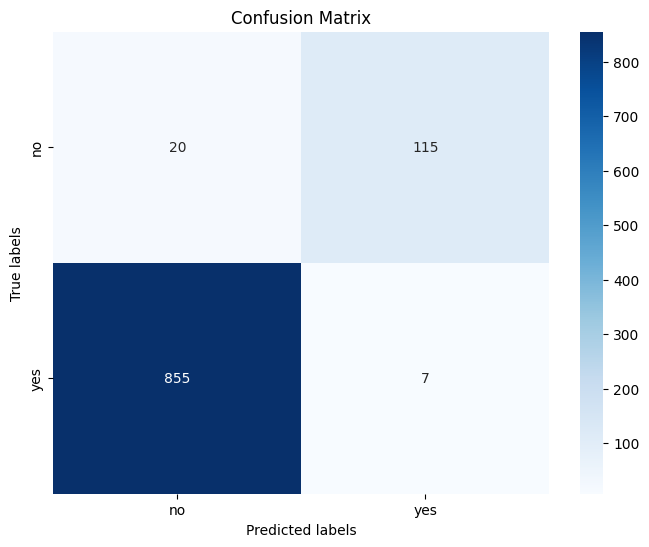

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing import image

from google.colab import drive

drive.mount('/content/drive')


# Load the VGG16 model
model_path = '/content/drive/My Drive/DSGP Group 24/Dataset/Model/NinaModel_VGG-19.h5'
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict the class of an image
def predict_image_class(image_path, model):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    return np.argmax(prediction)

# Directory containing testing images
test_dir = '/content/drive/My Drive/DSGP Group 24/Dataset/Model_Data/Test/'

# Get list of image files in the directory
test_image_files = []
true_labels = []

for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            test_image_files.append(os.path.join(label_path, file))
            true_labels.append(0 if label == 'no' else 1)

# Full paths to the images
test_image_paths = test_image_files

# Convert lists to numpy arrays
true_labels = np.array(true_labels)

# Predicted labels for the images
predicted_labels = []
for path in test_image_paths:
    predicted_label = predict_image_class(path, model)
    predicted_labels.append(predicted_label)
predicted_labels = np.array(predicted_labels)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
